In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### import libs


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k

import csv
import cv2
import os

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201 ,DenseNet121
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split

from scipy import ndimage

In [2]:
imagetype= os.listdir("C:\\Users\\Lost Boy\\Desktop\\undergraduate project\\Datasets\\Fer13\\train")
test_imagetype= os.listdir("C:\\Users\\Lost Boy\\Desktop\\undergraduate project\\Datasets\\Fer13\\test")
imagetype.remove('disgust')
print(imagetype)
print(test_imagetype)


['angry', 'augmented', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [3]:
images = []    #images for train list will store all images
labels= []
t_images = []    #images for test list will store all images
t_labels= []
path = "C:/Users/Lost Boy/Desktop/undergraduate project/Datasets/Fer13/train/"
t_path = "C:/Users/Lost Boy/Desktop/undergraduate project/Datasets/Fer13/test/"


### **classes exept disgusted**

In [97]:
path = "C:/Users/Lost Boy/Desktop/undergraduate project/Datasets/Fer13/train/"
i = 'disgust'
print(i)
flower_path=path+str(i)
data_list=[j for j in os.listdir(flower_path) if j.endswith(".jpg") ]
counter=0
for data in data_list:
#          if counter> 2390: break
    img=cv2.imread(flower_path + '/'+ data)
    img = cv2.resize(img , (64,64))
    images.append(img)
    labels.append(i)
    
print("total train images:",len(images))
print("total train images:",len(labels))

disgust
total train images: 436
total train images: 436


In [98]:
images = np.array(images)

In [99]:
datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125)    #Also try nearest, constant, reflect, wrap


In [59]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=100,
                    shear_range=0.01,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [63]:
i = 0
for batch in train_datagen.flow(images, batch_size=16,  
                          save_to_dir='C:/Users/Lost Boy/Desktop/undergraduate project/Datasets/Fer13/train/augmented', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 200:
        break 


In [5]:
for i in imagetype:
    print(i)
    flower_path=path+str(i)
    data_list=[j for j in os.listdir(flower_path) if j.endswith(".jpg") ]
    counter=0
    for data in data_list:
#         if counter> 2390: break
        img=cv2.imread(flower_path + '/'+ data)
        img = cv2.resize(img , (64,64))
        images.append(img)
        labels.append(i)
    
print("total train images:",len(images))
print("total train images:",len(labels))


angry
augmented
fear
happy
neutral
sad
surprise
total train images: 31840
total train images: 31840


In [6]:
t_images = []
t_labels = []

In [7]:
for i in test_imagetype:
    print(i)
    flower_path=t_path+str(i)
    test_data_list=[j for j in os.listdir(flower_path) if j.endswith(".jpg") ]
    counter=0
    for data in test_data_list:
#         if counter> 2390: break
        img=cv2.imread(flower_path + '/'+ data)
        img = cv2.resize(img , (64,64))
        t_images.append(img)
        t_labels.append(i)
print("total test images:",len(t_images))
print("total test images:",len(t_labels))

angry
disgust
fear
happy
neutral
sad
surprise
total test images: 7178
total test images: 7178


In [8]:
encode= LabelEncoder()
labels=encode.fit_transform(labels)
encode2= LabelEncoder()
t_labels = encode2.fit_transform(t_labels)
t_labels[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
labels=labels.reshape(-1,1)
onehotencoder= OneHotEncoder()
labels=onehotencoder.fit_transform(labels)
labels=labels.toarray()
labels
print("train labels is ready!")

train labels is ready!


In [10]:
t_labels=t_labels.reshape(-1,1)
onehotencoder= OneHotEncoder()
t_labels=onehotencoder.fit_transform(t_labels)
t_labels=t_labels.toarray()
print("test labels is ready!")
t_labels[:10]

test labels is ready!


array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [11]:
images=np.array(images)
print(images.shape)
print(labels.shape)

(31840, 64, 64, 3)
(31840, 7)


In [12]:
t_images=np.array(t_images)
print(t_images.shape)
print(t_labels.shape)

(7178, 64, 64, 3)
(7178, 7)


In [13]:
images,labels = shuffle(images, labels, random_state=10)
t_images , t_labels =  shuffle(t_images, t_labels, random_state=10)

C:\Users\Lost Boy\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[0. 0. 0. 0. 0. 1. 0.]')

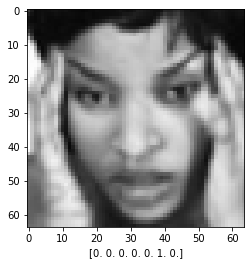

In [14]:
plt.imshow(images[4])
plt.xlabel(labels[4])

In [18]:
!pip install Densenet121

ERROR: Could not find a version that satisfies the requirement Densenet121
ERROR: No matching distribution found for Densenet121


In [20]:
from tensorflow.keras.applications.densenet import DenseNet201 ,DenseNet121
model = keras.Sequential([
# Data Augmentation 
  

  DenseNet121(weights='imagenet',include_top=False, classes=7, input_shape=(48,48,3)), #Extract features 

  layers.BatchNormalization(),


#CNN layer 

  layers.Conv2D(128,(3,3),padding = 'same'), 
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.1),
  layers.MaxPooling2D(pool_size = (2,2),padding = 'same'), 
  layers.Dropout(0.5), 


  layers.Flatten(),
#Fully connected 1st layer 

  layers.Dense(256),
  layers.BatchNormalization(), 
  layers.Activation('relu'), 
  layers.Dropout(0.65), 

# Fully connected layer 2nd layer

#   layers.Dense(128),
#   layers.BatchNormalization(), 
#   layers.Activation('relu'), 
#   layers.Dropout(0.5), 


  layers.Dense(7, activation='softmax'),
                          
])
model.summary()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/densenet/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5: 403 -- Forbidden

In [25]:
!pip install livelossplot

Could not fetch URL https://pypi.org/simple/livelossplot/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/livelossplot/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)'))) - skipping


ERROR: Could not find a version that satisfies the requirement livelossplot
ERROR: No matching distribution found for livelossplot


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.6.0


In [28]:
model = keras.Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
# opt = Adam(lr= 0.00010000000474974513)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)      

C:\Users\Lost Boy\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [30]:
opt = keras.optimizers.Adam(learning_rate=0.00010000000474974513)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
r = model.fit(images, labels, batch_size=32 , epochs=64 , validation_data = (t_images, t_labels))

Epoch 1/64
995/995 [==============================] - 1091s 1s/step - loss: 1.9494 - accuracy: 0.2655 - val_loss: 1.7356 - val_accuracy: 0.3307
Epoch 2/64
995/995 [==============================] - 1424s 1s/step - loss: 1.6929 - accuracy: 0.3664 - val_loss: 1.5168 - val_accuracy: 0.4172
Epoch 3/64
995/995 [==============================] - 1321s 1s/step - loss: 1.5269 - accuracy: 0.4247 - val_loss: 1.4450 - val_accuracy: 0.4466
Epoch 4/64
995/995 [==============================] - 1354s 1s/step - loss: 1.4108 - accuracy: 0.4684 - val_loss: 1.5675 - val_accuracy: 0.4288
Epoch 5/64
995/995 [==============================] - 1069s 1s/step - loss: 1.3160 - accuracy: 0.5040 - val_loss: 1.6503 - val_accuracy: 0.4136
Epoch 6/64
995/995 [==============================] - 1195s 1s/step - loss: 1.2404 - accuracy: 0.5319 - val_loss: 1.2764 - val_accuracy: 0.5213
Epoch 7/64
995/995 [==============================] - 1440s 1s/step - loss: 1.1764 - accuracy: 0.5566 - val_loss: 1.1837 - val_accuracy: